In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib as mpl


In [55]:
# ---------- Parameters ----------
EXCEL_PATH = r"Z:\UriMons\cFos\Results\Fisher_RtoZ\cFos-Grooming_correlations_with_fisherZ_tests_and_deltaR.xlsx"
Z_SHEET    = "Z_SE"   # z-scores live here (columns end with _z)
R_SHEET    = "R_N"    # r values live here (columns end with _r; *_N are sample sizes)
SAVE_FIG   = True

# Where to save the PNGs
OUT_Z = r"Z:\UriMons\cFos\Results\Fisher_RtoZ\Z_score_heatmap.png"
# r heatmap saved next to OUT_Z by default
OUT_R = os.path.join(os.path.dirname(OUT_Z), "r_heatmap.png")

mpl.rcParams["font.family"] = "Calibri"


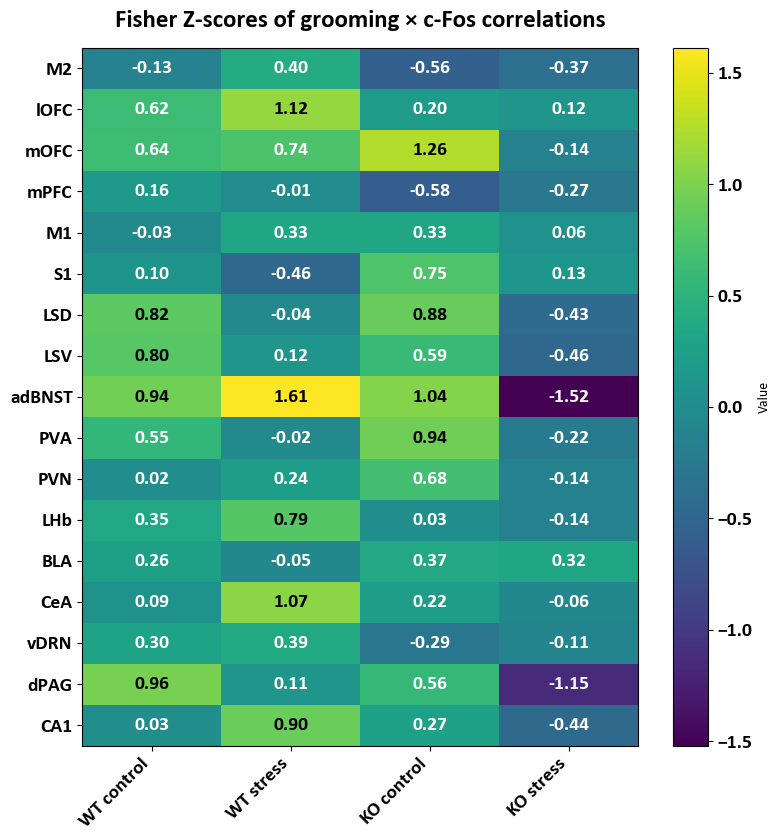

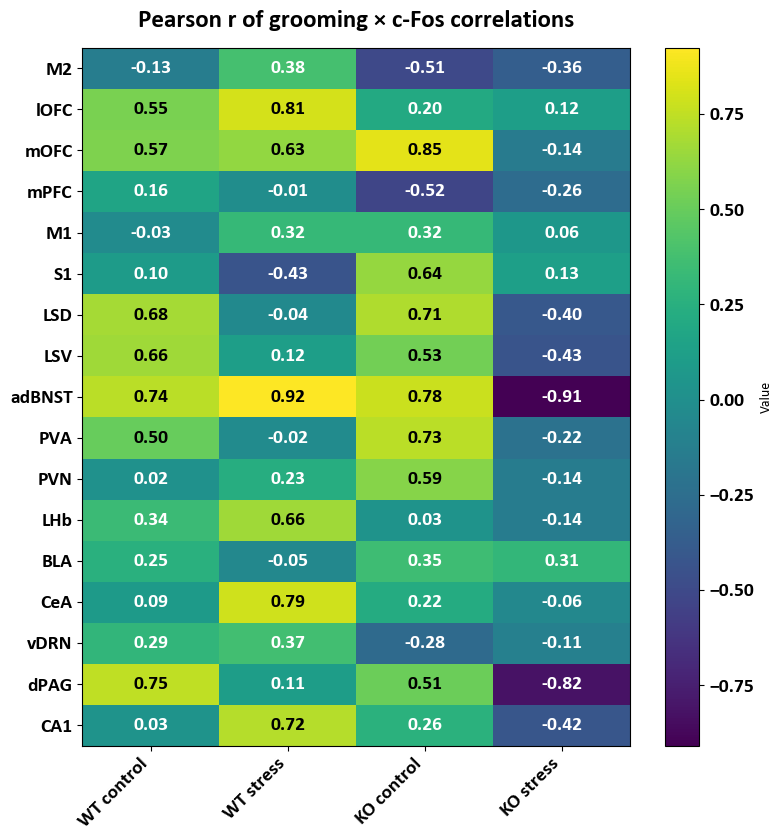

Saved z heatmap: Z:\UriMons\cFos\Results\Fisher_RtoZ\Z_score_heatmap.png
Saved r heatmap: Z:\UriMons\cFos\Results\Fisher_RtoZ\r_heatmap.png


In [59]:
def plot_heatmap(df_matrix: pd.DataFrame, title: str, outfile: str | None):
    """Matplotlib-only heatmap with cell annotations."""
    fig_h = max(6, 0.5 * len(df_matrix))  # scale height with #regions
    fig, ax = plt.subplots(figsize=(8, fig_h))
    im = ax.imshow(df_matrix.values, aspect="auto",cmap="viridis",
                   vmin=np.nanmin(df_matrix.values),
                   vmax=np.nanmax(df_matrix.values))
    ax.set_xticks(np.arange(df_matrix.shape[1]), labels=list(df_matrix.columns), rotation=45, ha="right")
    ax.set_yticks(np.arange(df_matrix.shape[0]), labels=list(df_matrix.index))
    
    # Increase header sizes
    ax.tick_params(axis="x", labelsize=14)
    ax.tick_params(axis="y", labelsize=14)

    # Optional: bold row labels
    for label in ax.get_xticklabels():
        label.set_fontweight("bold")

    for label in ax.get_yticklabels():
        label.set_fontweight("bold")
    
    # annotate values with automatic black/white switching for readability
    norm = plt.Normalize(
        vmin=np.nanmin(df_matrix.values),
        vmax=np.nanmax(df_matrix.values)
    )
    cmap = im.get_cmap()

    for i in range(df_matrix.shape[0]):
        for j in range(df_matrix.shape[1]):
            val = df_matrix.iloc[i, j]
            if pd.notna(val):
                r, g, b, _ = cmap(norm(val))
                luminance = 0.299 * r + 0.587 * g + 0.114 * b  # perceived brightness
                text_color = "black" if luminance > 0.6 else "white"

                ax.text(
                    j, i, f"{val:.2f}",
                    ha="center", va="center",
                    fontsize=14, fontweight="bold",
                    color=text_color
                )

    ax.set_title(title, fontsize=18, fontweight="bold", pad=15)
    cbar = fig.colorbar(im, ax=ax)
    cbar.set_label("Value")
    # Increase size and make colorbar tick labels bold
    cbar.ax.tick_params(labelsize=14)
    for label in cbar.ax.get_yticklabels():
        label.set_fontweight("bold")

    plt.tight_layout()

    if SAVE_FIG and outfile:
        plt.savefig(outfile, dpi=300, bbox_inches="tight")
    plt.show()

# ---------- Z heatmap ----------
df_z = pd.read_excel(EXCEL_PATH, sheet_name=Z_SHEET)
z_cols = [c for c in df_z.columns if isinstance(c, str) and c.endswith("_z")]
z_df   = df_z[["Region"] + z_cols].set_index("Region")
z_df.columns = (
    z_df.columns
        .str.replace("_z", "", regex=False)
        .str.replace("_", " ")
)
plot_heatmap(z_df, "Fisher Z-scores of grooming × c-Fos correlations", OUT_Z)

# ---------- r heatmap ----------
df_r = pd.read_excel(EXCEL_PATH, sheet_name=R_SHEET)
r_cols = [c for c in df_r.columns if isinstance(c, str) and c.endswith("_r")]  # ignore *_N
r_df   = df_r[["Region"] + r_cols].set_index("Region")
r_df.columns = (
    r_df.columns
        .str.replace("_r", "", regex=False)
        .str.replace("_", " ")
)
plot_heatmap(r_df, "Pearson r of grooming × c-Fos correlations", OUT_R)

print(f"Saved z heatmap: {OUT_Z}")
print(f"Saved r heatmap: {OUT_R}")